### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [443]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [446]:
data = pd.read_csv('data/coupons.csv')

In [448]:
# Show the whole data 
pd.set_option('display.max_columns', None)


In [450]:
# Total rows and columns in this data set
print ( f"Total rows = {data.shape[0] }")
print ( f"Total columns = {data.shape[1] }")

Total rows = 12684
Total columns = 26


2. Investigate the dataset for missing or problematic data.

# Check for missing column information

In [454]:
data.isnull().sum().sort_values(ascending=False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

## Visualize the number of missing values per column on a BAR chart with the column names

In [457]:
# Function to get missing column value information from a dataframe
def missing_value_col(df):
    # Get the missing column value count
    missing_counts = data.isnull().sum()

    # Filter out columns for plotting
    missing_counts = missing_counts[missing_counts > 0]
    
    return missing_counts

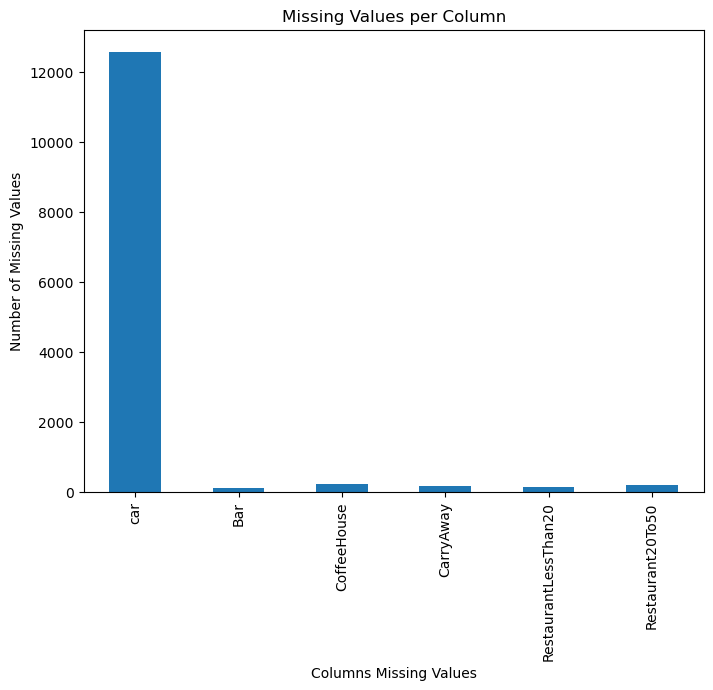

In [459]:
# Call the defined function to get the missing column information 
missing_counts = missing_value_col(data)

# Plot the missing data
missing_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Missing Values per Column')
plt.xlabel('Columns Missing Values')
plt.ylabel('Number of Missing Values')
plt.show()

# Here is the summary of the just column names for the missing value counts

In [462]:
# Filter out columns with missing values only 
print(missing_counts)

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

## Drop the car column as it is a large population with NaN value. Also drop "toCoupon_GEQ5min" and "direction_opp" based on the above summary data statistic information

In [469]:
# Drop the column for car, toCoupon_GEQ5min and direction_opp based on the data we observed before
data = data.drop(columns = ['car', 'toCoupon_GEQ5min', 'direction_opp'])


## Remove all the duplicate rows based on its current state

In [532]:
# Frist Remove duplicat rows from the dataframe
data = data.drop_duplicates()


## Get all above column names which have missing values ( NaN count information )

In [535]:
# Create a list for the missing value columns without car as the car column was dropped from the dataframe for analysis
NaN_cols = [ col for col in missing_counts.index.tolist() if col != 'car']


In [537]:
# Describe the columns 
data[NaN_cols].describe()

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12610,12610,12610,12610,12610
unique,5,5,5,5,5
top,never,less1,1~3,1~3,less1
freq,5285,3579,4795,5485,6230


# Replace NaN value with the columns frequent values that are currently present so that there are no missing values in the data set

In [542]:
# Replace missing values of the columns with the max occuring value
for col in NaN_cols:
    data[col] = data[col].fillna(data[col].value_counts().idxmax())


In [544]:
# Check for any additional duplicate records
data.duplicated().sum()

0

In [546]:
# Check for the final data shape before doing additional analysis
data.shape

(12610, 23)

In [548]:
# Handle any outliers
pd.set_option('display.max_columns', None)
data.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
count,12610,12610,12610,12610.000000,12610,12610,12610,12610,12610,12610,12610.000000,12610,12610,12610,12610,12610,12610,12610,12610,12610.000000,12610.000000,12610.000000,12610.000000
unique,3,4,3,NaN,5,5,2,2,8,5,NaN,6,25,9,5,5,5,5,5,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,NaN,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN
freq,6266,7248,10011,NaN,3220,3989,7031,6469,2642,5068,NaN,4325,1861,2006,5285,3579,4795,5485,6230,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.267248,NaN,NaN,NaN,NaN,NaN,NaN,0.414512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.559794,0.116019,0.215543,0.567565
std,NaN,NaN,NaN,19.153386,NaN,NaN,NaN,NaN,NaN,NaN,0.492657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496432,0.320260,0.411215,0.495434
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000


## Replace values for some of the columns as shown below to improve data analysis

In [551]:
# Remove the warning sign for the replace function
pd.set_option('future.no_silent_downcasting', True)

# Make a copy of the dataframe to work with
cleaned_data_df = data.copy()

# Replace columns values for the following
cleaned_data_df = cleaned_data_df.replace({'expiration':{'2h': 0, '1d' : 1},
                    'gender':{'Male': 0, 'Female' : 1},
                    'age':{'below21': 0, '21-30': 1, '31-40': 2, '41-50': 3, '50plus': 4},
                    'education':{'Some High School': 0, 'High School Graduate': 1, 'Some college - no degree': 2, 'Associates degree': 3, 'Bachelors degree': 4, 'Graduate degree (Masters or Doctorate)': 5},
                    'Bar':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'CoffeeHouse':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'CarryAway':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'RestaurantLessThan20':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'Restaurant20To50':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'temperature':{30: 0, 55: 1, 80: 2}})

# Change the data type for age column
cleaned_data_df['age'] = cleaned_data_df['age'].astype(int)

## Rename passanger column name
cleaned_data_df = cleaned_data_df.rename(columns = {'passanger': 'passenger'})

#Replace income values
cleaned_data_df = cleaned_data_df.replace ({'income': {'$37500 - $49999': 50000, '$62500 - $74999': 75000, '$12500 - $24999': 25000,
       '$75000 - $87499': 87500, '$50000 - $62499': 65000, '$25000 - $37499': 38000,
       '$100000 or More': 100000 , '$87500 - $99999': 99999, 'Less than $12500': 125000}})
# Update income values


4. What proportion of the total observations chose to accept the coupon?

# Distribution of coupon acceptance based on the cleaned data

In [554]:
coupon_accepted_count = cleaned_data_df['Y'].value_counts()
proportion_accepted = ( coupon_accepted_count[1] / coupon_accepted_count.sum() ) * 100
proportion_not_accepted = ( coupon_accepted_count[0] / coupon_accepted_count.sum() ) * 100
print(f"The proportion of observations that accepted the coupon is: {proportion_accepted:.2f}")


The proportion of observations that accepted the coupon is: 56.76


# Visualization of the Distribution of coupon acceptance

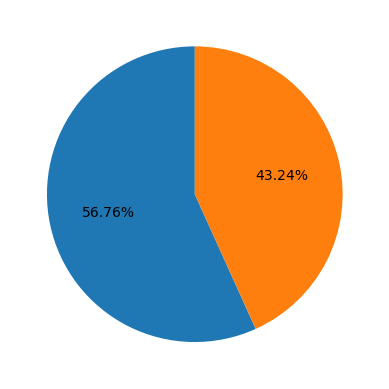

In [557]:
plt.pie(coupon_accepted_count, autopct = '%.2f%%', startangle = 90)
plt.show()

5. Use a bar plot to visualize the `coupon` column.

# Distribution of type of coupons 

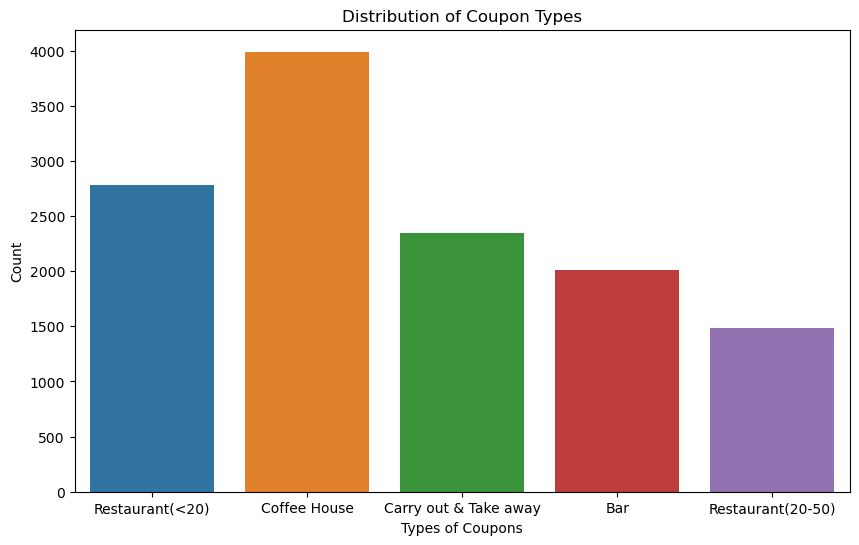

In [561]:
plt.figure(figsize=(10, 6))
sns.countplot(x=cleaned_data_df["coupon"], hue='coupon', data=cleaned_data_df)
plt.title('Distribution of Coupon Types')
plt.xlabel('Types of Coupons')
plt.ylabel('Count')
plt.show()



6. Use a histogram to visualize the temperature column.

# Histogram for related to temperature

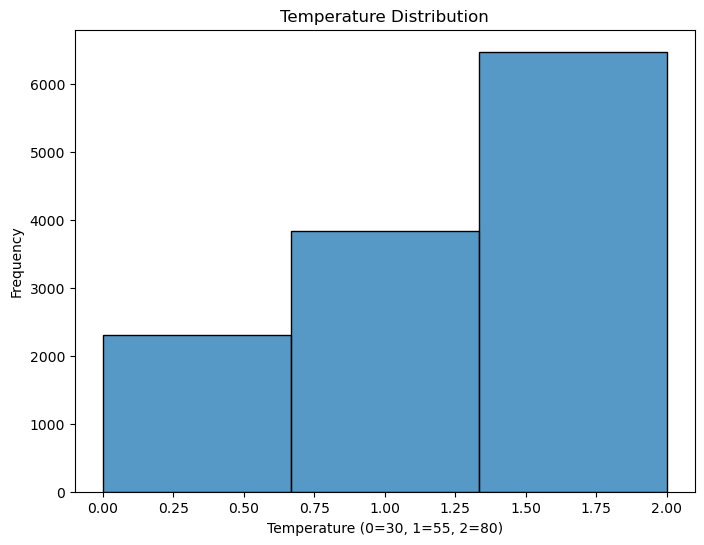

In [565]:
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data_df['temperature'], bins=3)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (0=30, 1=55, 2=80)')
plt.ylabel('Frequency')
#plt.grid(axis='y', alpha=0.75)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.

# Print all the records that have Bar coupons

In [575]:
bar_df = cleaned_data_df.query('coupon == "Bar"')


2. What proportion of bar coupons were accepted?


# The below code show all bar coupons accepted vs. not accepted proportions

Total Bar coupons accepted :  41.00%


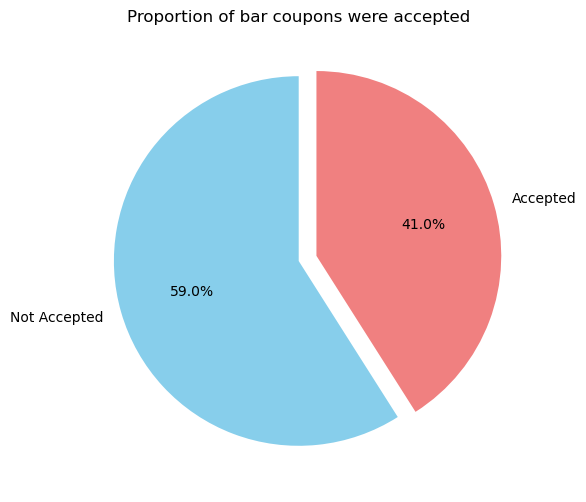

In [589]:
value_counts = bar_df['Y'].value_counts(normalize=True) * 100
print(f"Total Bar coupons accepted :  {value_counts[1]:.2f}%")

# Create labels for the pie chart based on conditions
for key in value_counts.index:
     if (key == 0):
        pie_labels = ['Not Accepted', 'Accepted']

# Plot using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], explode=(0, 0.1))
plt.title('Proportion of bar coupons were accepted')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [616]:
fewer_than_3 = bar_df.query('Y == 1 & Bar <= 2')['Y'].mean()
greater_than_3 = bar_df.query('Y ==1 & Bar > 2')['Y'].mean()

#assert fewer_than_3>greater_than_3
f"People who accepted the coupon and went to the bar, went {'less than equal to 3 times' if fewer_than_3 > greater_than_3 else 'more than 3 times'}"

'People who accepted the coupon and went to the bar, went more than 3 times'

In [624]:
# Visuall display the information 

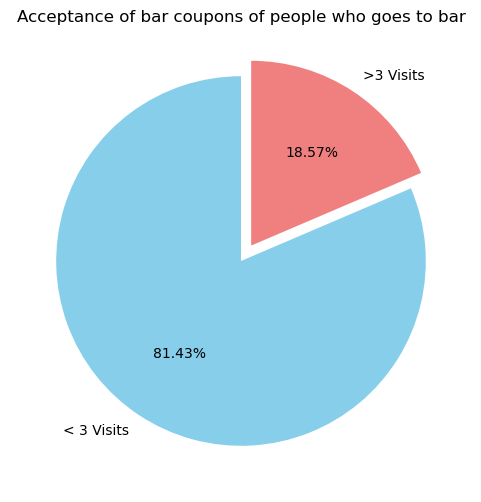

In [626]:
# Plot using a pie chart
plt.figure(figsize=(6, 6))
plt.pie([fewer_than_3, greater_than_3], labels=['< 3 Visits', '>3 Visits'], autopct='%1.2f%%', startangle=90, colors=['skyblue', 'lightcoral'], explode=(0, 0.1))
plt.title('Acceptance of bar coupons of people who goes to bar')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


## The comparison is based on age > 25 for the population of people went to bar more than once a month who accepted the coupon.

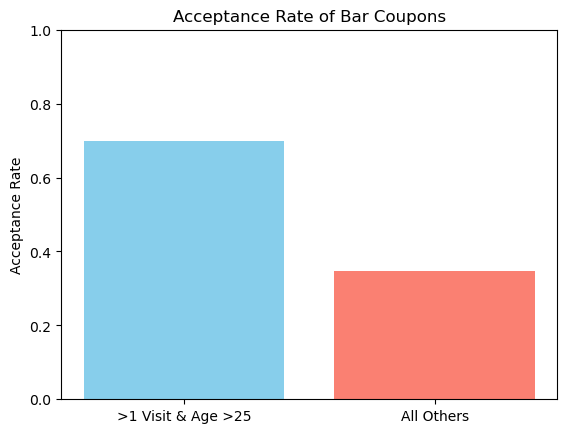

Acceptance rate for >1 visit & age >25: 0.70
Acceptance rate for all others: 0.35


In [636]:
group_more_than_once_and_over_25 = bar_df[(bar_df['Bar'] > 1) & (bar_df['age'] > 25)]
group_all_others = bar_df[~((bar_df['Bar'] > 1) & (bar_df['age'] > 25))]

# Calculate acceptance rates
acceptance_rate_more_than_once_and_over_25 = group_more_than_once_and_over_25['Y'].mean() 
acceptance_rate_all_others = group_all_others['Y'].mean()

# Plot the acceptance rates
plt.bar(['>1 Visit & Age >25', 'All Others'], [acceptance_rate_more_than_once_and_over_25, acceptance_rate_all_others], color=['skyblue', 'salmon'])
plt.title('Acceptance Rate of Bar Coupons')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits to show proportion
plt.show()

# Print the acceptance rates for clarity
print(f"Acceptance rate for >1 visit & age >25: {acceptance_rate_more_than_once_and_over_25:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_all_others:.2f}")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


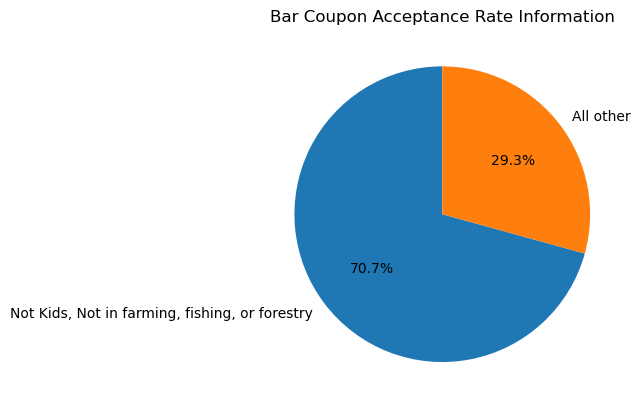

Acceptance rate for >1 visit, no kid, not farming: 0.71
Acceptance rate for all others: 0.30


In [664]:
# Define the groups
group_more_than_once_no_kid_not_farming = bar_df[
    (bar_df['Bar'] > 1) &
    (bar_df['passenger'] != 'Kid(s)') &
    (~bar_df['occupation'].isin(['Farming Fishing & Forestry']))
]

# Get the rest of the data from the bar data frame
group_all_others = bar_df[~(
    (bar_df['Bar'] > 1) &
    (bar_df['passenger'] != 'Kid(s)') &
    (~bar_df['occupation'].isin(['Farming Fishing & Forestry'])))
]

# Calculate acceptance rates
acceptance_rate_more_than_once_no_kid_not_farming = group_more_than_once_no_kid_not_farming['Y'].mean()
acceptance_rate_all_others = group_all_others['Y'].mean()

plt.pie([acceptance_rate_more_than_once_no_kid_not_farming, acceptance_rate_all_others], autopct='%1.1f%%',startangle=90, labels=['Not Kids, Not in farming, fishing, or forestry','All other'])
plt.title("Bar Coupon Acceptance Rate Information")
plt.show()

# Print the acceptance rates for clarity
print(f"Acceptance rate for >1 visit, no kid, not farming: {acceptance_rate_more_than_once_no_kid_not_farming:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_all_others:.2f}")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [699]:
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [701]:
bar_df['RestaurantLessThan20'].unique()

array([3, 2, 1, 4, 0], dtype=object)

Acceptance rate for  > 1, No Kids, Not Widowed: 0.71
Acceptance rate for Once, < 30: 0.71
Acceptance rate for Cheap Rest. >4 per month & income <50k: 0.46


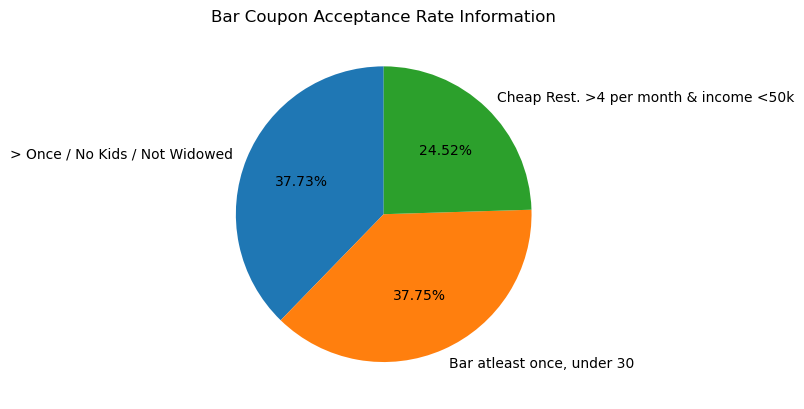

In [703]:
# Define the groups
group_1 = bar_df[
    (bar_df['Bar'] > 1) &
    (bar_df['passenger'] != 'Kid(s)') &
    (bar_df['maritalStatus'] != 'Widowed')
]

group_2 = bar_df[
    (bar_df['Bar'] > 1) &
    (bar_df['age'] < 30)
]

group_3 = bar_df[
    (bar_df['RestaurantLessThan20'] > 3) &
    (bar_df['income'] < 50000)
]

# Calculate acceptance rates
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()
acceptance_rate_group_3 = group_3['Y'].mean()

# Print the acceptance rates for clarity
print(f"Acceptance rate for  > 1, No Kids, Not Widowed: {acceptance_rate_group_1:.2f}")
print(f"Acceptance rate for Once, < 30: {acceptance_rate_group_2:.2f}")
print(f"Acceptance rate for Cheap Rest. >4 per month & income <50k: {acceptance_rate_group_3:.2f}")

plt.pie([acceptance_rate_group_1, acceptance_rate_group_2, acceptance_rate_group_3], autopct='%1.2f%%',startangle=90, labels=['> Once / No Kids / Not Widowed', 'Bar atleast once, under 30','Cheap Rest. >4 per month & income <50k'])
plt.title("Bar Coupon Acceptance Rate Information")
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Below is the findings

In [709]:
print("Serving coupons to the following demographics ('> 1, No Kids, Not Widowed' and 'Acceptance rate for Once, < 30') are likely to lead to more bar visits.")

Serving coupons to the following demographics ('> 1, No Kids, Not Widowed' and 'Acceptance rate for Once, < 30') are likely to lead to more bar visits.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Addition assessment around coupons for Coffee

In [713]:
coffee_df = cleaned_data_df.query('coupon == "Coffee House"')

Coffee coupons accepted :  49.86%


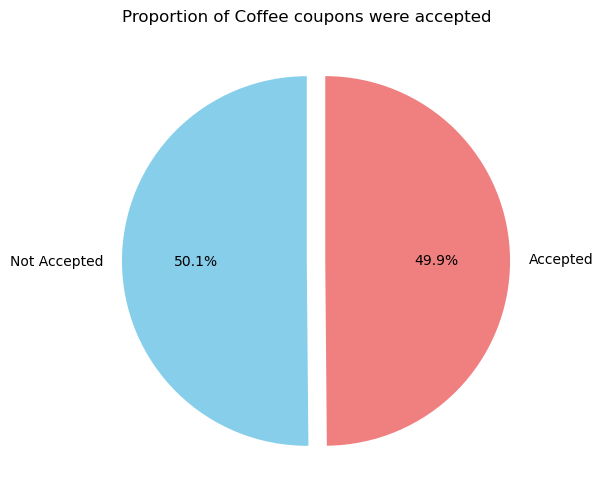

In [715]:
value_counts = coffee_df['Y'].value_counts(normalize=True) * 100
print(f"Coffee coupons accepted :  {value_counts[1]:.2f}%")

# Create labels for the pie chart based on conditions
for key in value_counts.index:
     if (key == 0):
        pie_labels = ['Not Accepted', 'Accepted']
   
# Plot using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], explode=(0, 0.1))
plt.title('Proportion of Coffee coupons were accepted')
plt.show()

In [717]:
## Show the all category columns characteristics

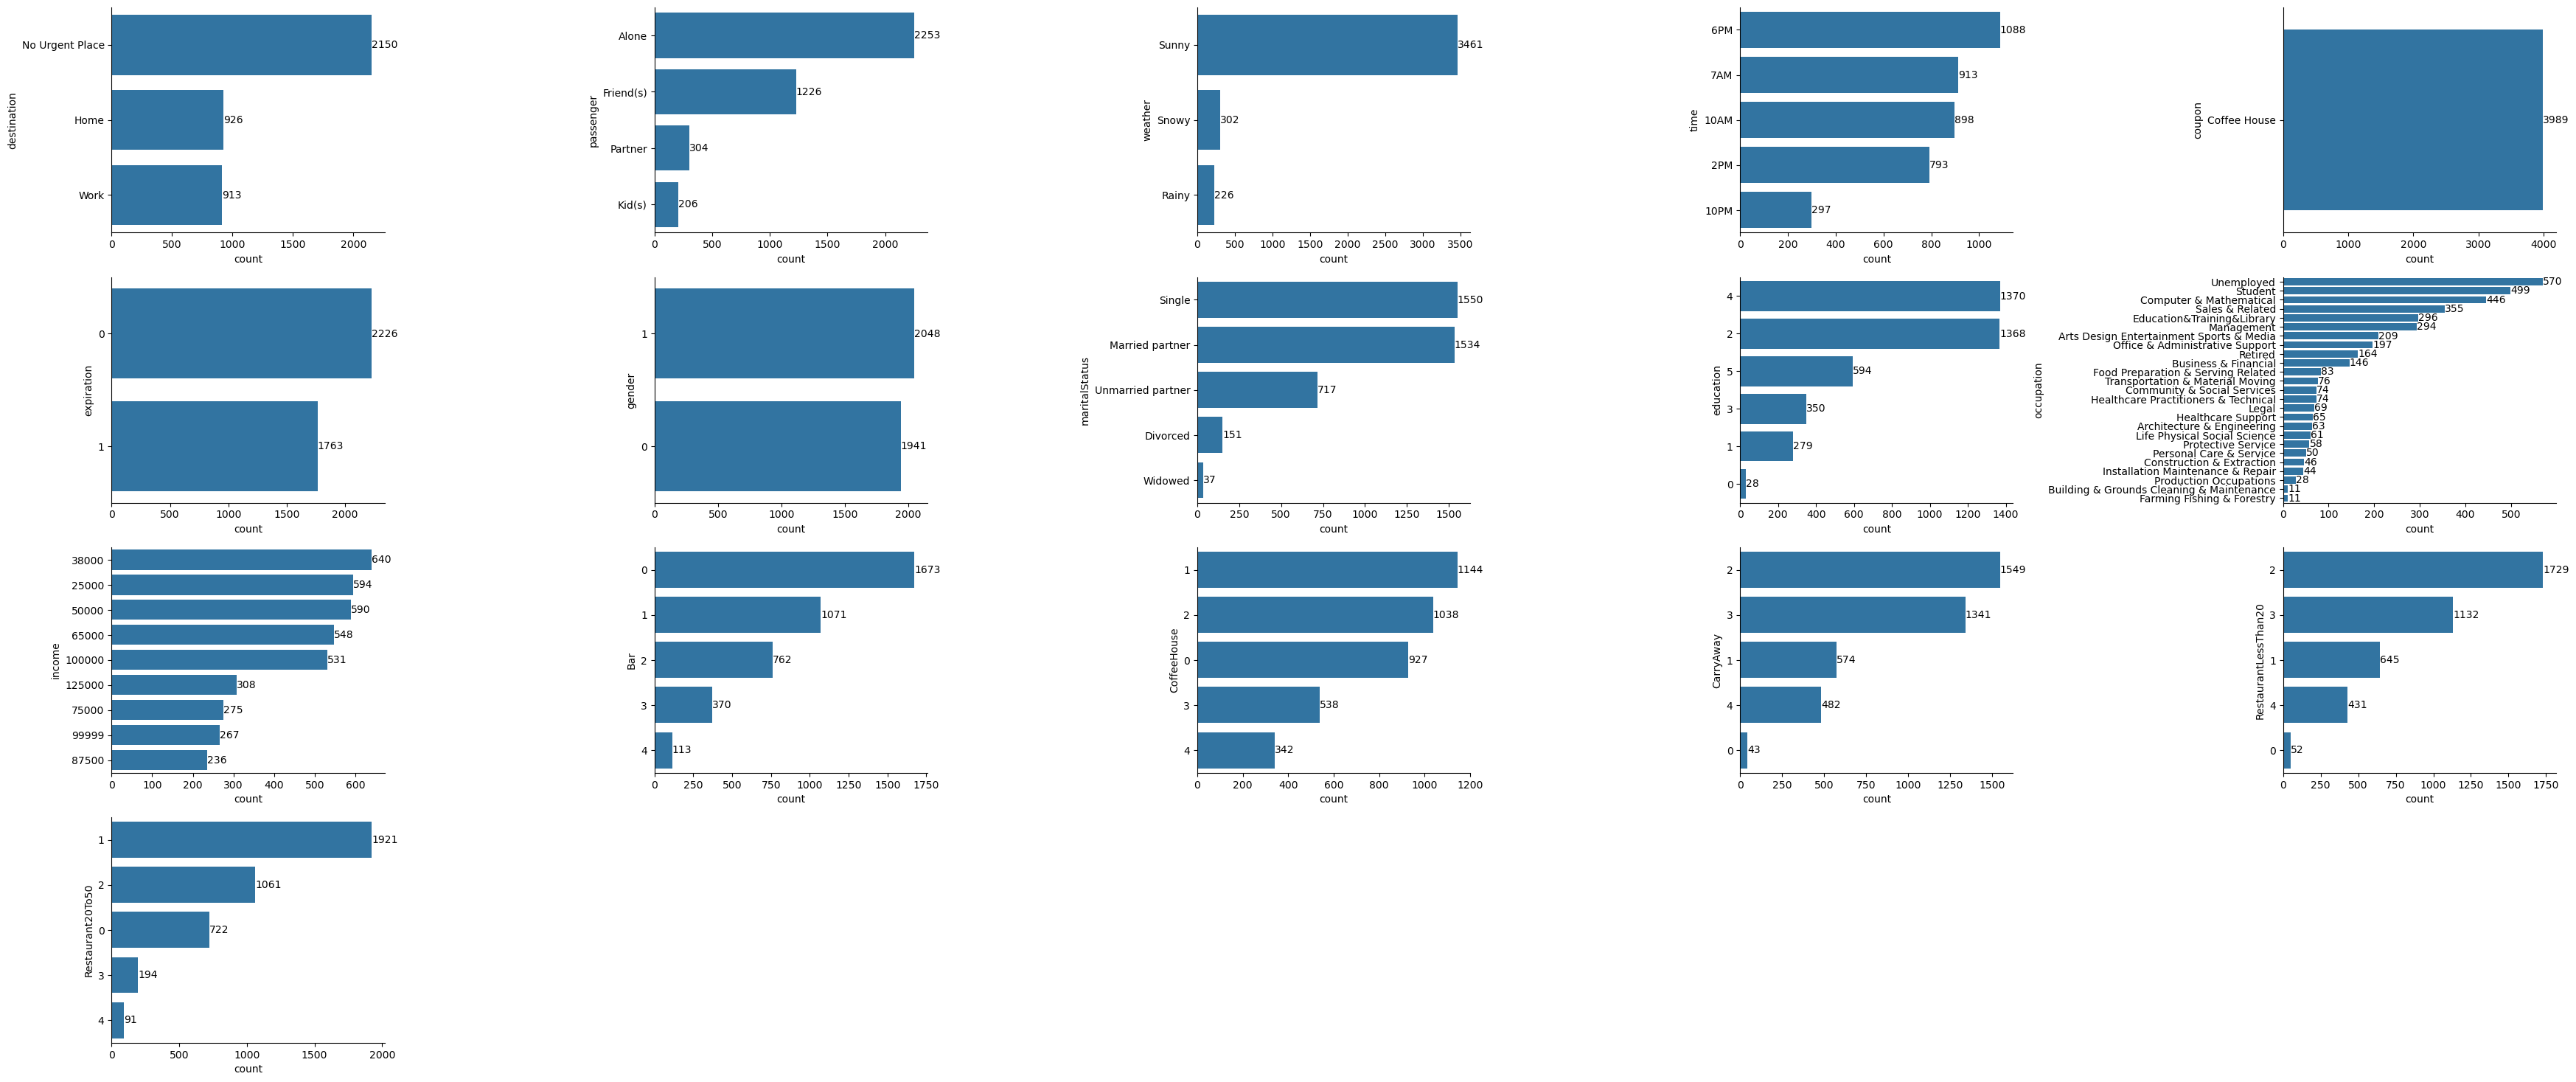

In [719]:
plt.figure(figsize=(35,18))
for i in range(len(cat)):
    plt.subplot(5, 5, i+1)
    ax = sns.countplot(y=cat[i], data=coffee_df,  order=coffee_df[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    sns.despine()
plt.tight_layout()

## Below heatmap related to coupon related to coffee.

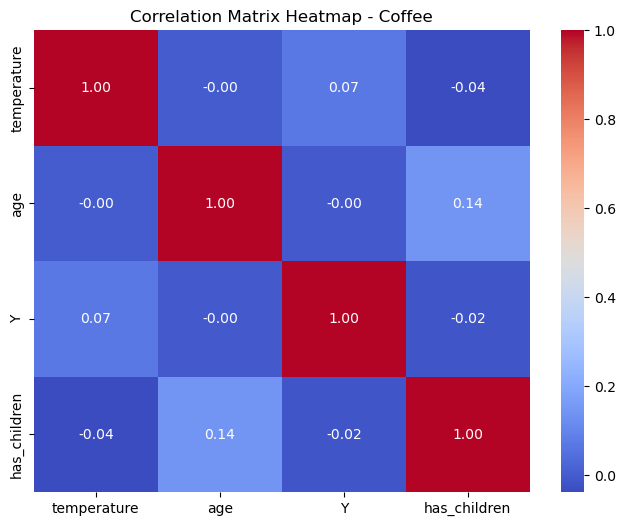

In [722]:
corr_matrix = coffee_df[['temperature', 'age', 'Y', 'has_children']].corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap - Coffee')
plt.show()

## Overall acceptance ratio of all coupon type

In [725]:
# Calculate the acceptance ratio
total_entries = len(cleaned_data_df)
accepted_entries = cleaned_data_df['Y'].sum()  # Sum of 1s in the 'Accept' column
acceptance_ratio = accepted_entries / total_entries

# Display the acceptance ratio
print(f"Overall Acceptance Ratio for all coupon types: {acceptance_ratio:.2f}")

Overall Acceptance Ratio for all coupon types: 0.57


In [727]:
# Calculate the acceptance ratio
total_entries = len(cleaned_data_df)

coupons = cleaned_data_df['coupon'].unique()

for coup in coupons: 
    o_q = cleaned_data_df.query('coupon == @coup')
    accepted_entries = o_q['Y'].sum()  # Sum of 1s in the 'Accept' column
    acceptance_ratio = accepted_entries / total_entries
        # Display the acceptance ratio
    print(f"Overall Acceptance Ratio for all {coup} coupon types: {acceptance_ratio:.2f}")

Overall Acceptance Ratio for all Restaurant(<20) coupon types: 0.16
Overall Acceptance Ratio for all Coffee House coupon types: 0.16
Overall Acceptance Ratio for all Carry out & Take away coupon types: 0.14
Overall Acceptance Ratio for all Bar coupon types: 0.07
Overall Acceptance Ratio for all Restaurant(20-50) coupon types: 0.05
